In [2]:
import xarray
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import matplotlib
from matplotlib.ticker import LogFormatter,LogLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.ticker import FuncFormatter, MultipleLocator
import matplotlib.ticker as ticker
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import cartopy.mpl.ticker as cticker
from matplotlib import gridspec
from matplotlib import rcParams
import cartopy.crs as ccrs
import numpy as np
import glob
import os
from tqdm.autonotebook import tqdm
from scipy import special
import math

/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
def loader(path):
    paths = glob.glob(path)
    paths.sort(key=os.path.getmtime)
    file = xarray.open_mfdataset(paths, combine='by_coords')
    return file

Ue_file_old = loader('/Volumes/4YP/Data/TimeSeries/Generated/Eulerian*.nc')
Ue_file_new = loader('/Volumes/JCHD/Microplastics_Paper/Data/TimeSeries/Eulerian*.nc')
Us_file = loader('/Volumes/4YP/Data/TimeSeries/Generated/Stokes*.nc')

In [4]:
Usu_point1 = Us_file.uuss[:,246,290].values
Usv_point1 = Us_file.vuss[:,246,290].values
Us_point1 = Usu_point1 + (1j*Usv_point1) 

Ueu_point1_old = Ue_file_old.U[:,246,290].values
Uev_point1_old = Ue_file_old.V[:,246,290].values
Ue_1_old = Ueu_point1_old + (1j*Uev_point1_old)

Ueu_point1_new = Ue_file_new.U[:,246,290].values
Uev_point1_new = Ue_file_new.V[:,246,290].values
Ue_1_new = Ueu_point1_new + (1j*Uev_point1_new)

Ul_1_old = Us_point1 + Ue_1_old
Ul_1_new = Us_point1 + Ue_1_new

In [5]:
Us_point1_24 = (abs(Us_point1)).reshape(-1, 8).mean(axis=1)
Ue_1_old_24 = (abs(Ue_1_old)).reshape(-1, 8).mean(axis=1)
Ue_1_new_24 = (abs(Ue_1_new)).reshape(-1, 8).mean(axis=1)
Ul_1_old_24 = (abs(Ul_1_old)).reshape(-1, 8).mean(axis=1)
Ul_1_new_24 = (abs(Ul_1_new)).reshape(-1, 8).mean(axis=1)

In [ ]:
Usu_point2 = Us_file.uuss[:,96,120].values
Usv_point2 = Us_file.vuss[:,96,120].values
Us_point2 = Usu_point2 + (1j*Usv_point2)

Ueu_point2_old = Ue_file_old.U[:,96,120].values
Uev_point2_old = Ue_file_old.V[:,96,120].values
Ue_2_old = Ueu_point2_old + (1j*Uev_point2_old)

Ueu_point2_new = Ue_file_new.U[:,96,120].values
Uev_point2_new = Ue_file_new.V[:,96,120].values
Ue_2_new = Ueu_point2_new + (1j*Uev_point2_new)

Ul_2_old = Us_point2 + Ue_2_old
Ul_2_new = Us_point2 + Ue_2_new

In [ ]:
Us_point2_24 = (abs(Us_point2)).reshape(-1, 8).mean(axis=1)
Ue_2_old_24 = (abs(Ue_2_old)).reshape(-1, 8).mean(axis=1)
Ue_2_new_24 = (abs(Ue_2_new)).reshape(-1, 8).mean(axis=1)
Ul_2_old_24 = (abs(Ul_2_old)).reshape(-1, 8).mean(axis=1)
Ul_2_new_24 = (abs(Ul_2_new)).reshape(-1, 8).mean(axis=1)

In [ ]:
time = Us_file.uuss['time'].values
days = time[3::8]

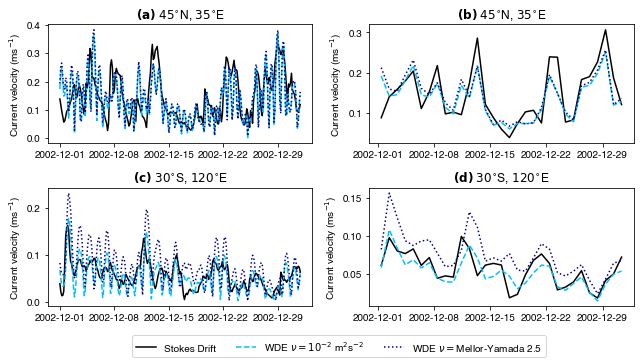

In [68]:
fig = plt.figure(figsize=(9,9))

font = {'family':'sans-serif',
        'sans-serif':['Helvetica'],
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

ax1 = plt.subplot(421)
ax1.set_title(r'$\bf{(a)}$ $45^{\circ}$N, $35^{\circ}$E')
ax1.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(time,abs(Us_point1), label='Stokes Drift', color='black')
plt.plot(time,abs(Ue_1_old), '--', label=r'WDE $\nu=10^{-2}$ m$^{2}$s$^{-2}$', color='deepskyblue')
plt.plot(time,abs(Ue_1_new),':', label=r'WDE $\nu=$Mellor-Yamada 2.5', color='darkblue')
#plt.text(time[230],0.233,'$D=1.051$', color='black')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax2 = plt.subplot(422)
ax2.set_title(r'$\bf{(b)}$ $45^{\circ}$N, $35^{\circ}$E')
ax2.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(days,abs(Us_point1_24), label='Stokes Drift', color='black')
plt.plot(days,abs(Ue_1_old_24), '--', label=r'$\nu=10^{-1}$', color='deepskyblue')
plt.plot(days,abs(Ue_1_new_24),':', label=r'$\nu=10^{-3}$', color='darkblue')
#plt.text(time[230],0.233,'$D=1.051$', color='black')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax3 = plt.subplot(423)
ax3.set_title(r'$\bf{(c)}$ $30^{\circ}$S, $120^{\circ}$E')
ax3.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(time,abs(Us_point2), label='Stokes Drift', color='black')
plt.plot(time,abs(Ue_2_old), '--', label=r'WDE $\nu=10^{-1}$ m$^{2}$s$^{-1}$', color='deepskyblue')
plt.plot(time,abs(Ue_2_new),':', label=r'WDE $\nu=10^{-3}$ m$^{2}$s$^{-1}$', color='darkblue')
#plt.text(time[230],0.1234,'$D=0.961$', color='black')
ax3.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax4 = plt.subplot(424)
ax4.set_title(r'$\bf{(d)}$ $30^{\circ}$S, $120^{\circ}$E')
ax4.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(days,abs(Us_point2_24), label='Stokes Drift', color='black')
plt.plot(days,abs(Ue_2_old_24), '--', label=r'$\nu=10^{-1}$', color='deepskyblue')
plt.plot(days,abs(Ue_2_new_24),':', label=r'$\nu=10^{-3}$', color='darkblue')
#plt.text(time[230],0.1234,'$D=0.961$', color='black')
ax4.xaxis.set_major_locator(ticker.MultipleLocator(7))

fig.tight_layout()

h1, l1 = ax1.get_legend_handles_labels()
ax3.legend(h1, l1,  bbox_to_anchor=(0,-.05, 2.2,-0.15), loc=9,ncol=4)

plt.savefig('/Users/jakecunningham/Documents/Summer Research/Figures/2002_Time_Series1.png', format='png', dpi=600, bbox_inches = "tight")

In [ ]:
fig = plt.figure(figsize=(9,9))

font = {'family':'sans-serif',
        'sans-serif':['Helvetica'],
        'weight' : 'normal',
        'size'   : 10}

matplotlib.rc('font', **font)

ax1 = plt.subplot(421)
ax1.set_title(r'$\bf{(e)}$ $45^{\circ}$N, $35^{\circ}$E')
ax1.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(time,abs(Us_point1), label='Stokes Drift', color='black')
plt.plot(time,abs(Ul_1_old), '--', label=r'Lagrangian $\nu=10^{-2}$ m$^{2}$s$^{-2}$', color='magenta')
plt.plot(time,abs(Ul_1_new),':', label=r'Lagrangian $\nu=$Mellor-Yamada 2.5', color='indigo')
#plt.text(time[230],0.233,'$D=1.051$', color='black')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax2 = plt.subplot(422)
ax2.set_title(r'$\bf{(f)}$ $45^{\circ}$N, $35^{\circ}$E')
ax2.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(days,abs(Us_point1_24), label='Stokes Drift', color='black')
plt.plot(days,abs(Ul_1_old_24), '--', label=r'$\nu=10^{-2}$', color='magenta')
plt.plot(days,abs(Ul_1_new_24),':', label=r'$\nu=10^{-3}$', color='indigo')
#plt.text(time[230],0.233,'$D=1.051$', color='black')
ax2.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax3 = plt.subplot(423)
ax3.set_title(r'$\bf{(g)}$ $30^{\circ}$S, $120^{\circ}$E')
ax3.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(time,abs(Us_point2), label='Stokes Drift', color='black')
plt.plot(time,abs(Ul_2_old), '--', label=r'Lagrangian $\nu=10^{-2}$ m$^{2}$s$^{-1}$', color='magenta')
plt.plot(time,abs(Ul_2_new),':', label=r'Lagrangian $\nu=10^{-3}$ m$^{2}$s$^{-1}$', color='indigo')
#plt.text(time[230],0.1234,'$D=0.961$', color='black')
ax3.xaxis.set_major_locator(ticker.MultipleLocator(7))

ax4 = plt.subplot(424)
ax4.set_title(r'$\bf{(h)}$ $30^{\circ}$S, $120^{\circ}$E')
ax4.set_ylabel('Current velocity (ms$^{-1}$)')
plt.plot(days,abs(Us_point2_24), label='Stokes Drift', color='black')
plt.plot(days,abs(Ul_2_old_24), '--', label=r'$\nu=10^{-2}$', color='magenta')
plt.plot(days,abs(Ul_2_new_24),':', label=r'$\nu=10^{-3}$', color='indigo')
#plt.text(time[230],0.1234,'$D=0.961$', color='black')
ax4.xaxis.set_major_locator(ticker.MultipleLocator(7))

fig.tight_layout()

h1, l1 = ax1.get_legend_handles_labels()
ax3.legend(h1, l1,  bbox_to_anchor=(0,-.05, 2.2,-0.15), loc=9,ncol=4)

plt.savefig('/Users/jakecunningham/Documents/Summer Research/Figures/2002_Time_Series2.png', format='png', dpi=600, bbox_inches = "tight")

## Magntiude - Statistics

In [98]:
Us_1 = Us_point1
Us_2 = Us_point2

Ue_one1 = Ue_1_old
Ue_two1 = Ue_1_new

Ue_one2 = Ue_2_old
Ue_two2 = Ue_2_new

In [101]:
print(np.mean(abs(Us_1)))
print(np.mean(abs(Us_2)))

0.14651471
0.056479216


In [94]:
print(np.mean(abs(Ue_one1)))
print(np.mean(abs(Ue_two1)))

0.13791604060200563
0.1447685235065239


In [95]:
print(np.mean(abs(Ue_one2)))
print(np.mean(abs(Ue_two2)))

0.052054110292454235
0.07557034111388032


In [81]:
print(np.mean(abs(Ue_one1+Us_1)))
print(np.mean(abs(Ue_two1+Us_1)))

0.12292137730005434
0.1236041862217406


In [82]:
print(np.mean(abs(Ue_one2+Us_2)))
print(np.mean(abs(Ue_two2+Us_2)))

0.044313575342688614
0.0633755688853035


In [84]:
print((np.mean(abs(Ue_one1))/np.mean(abs(Us_1))-1)*100)
print((np.mean(abs(Ue_two1))/np.mean(abs(Us_1))-1)*100)

-5.86881204028713
-1.1918190417907093


In [85]:
print((np.mean(abs(Ue_one2))/np.mean(abs(Us_2))-1)*100)
print((np.mean(abs(Ue_two2))/np.mean(abs(Us_2))-1)*100)

-7.8349270271635625
33.802037230334925


In [86]:
print((np.mean(abs(Ue_one1+Us_1))/np.mean(abs(Us_1))-1)*100)
print((np.mean(abs(Ue_two1+Us_1))/np.mean(abs(Us_1))-1)*100)

-16.103049214639853
-15.637014845705943


In [87]:
print((np.mean(abs(Ue_one2+Us_2))/np.mean(abs(Us_2))-1)*100)
print((np.mean(abs(Ue_two2+Us_2))/np.mean(abs(Us_2))-1)*100)

-21.540030514396825
12.210426769233118


## Angle Statistics

In [108]:
Us_1 = Us_point1
Us_2 = Us_point2

Ue_one1 = Ue_1_old
Ue_two1 = Ue_1_new

Ue_one2 = Ue_2_old
Ue_two2 = Ue_2_new

In [109]:
Us_angles1 = np.arctan(Us_1.imag/Us_1.real)
Ue_angles1 = np.arctan(Ue_two1.imag/Ue_two1.real)
Ul_angles1 = np.arctan((Us_1+Ue_two1).imag/(Us_1+Ue_two1).real)
delta1 = (((Us_angles1 - Ul_angles1) * 360) / (2*np.pi))

Text(0.5, 1.05, 'Histogram of $\\delta$$\\theta $ - lat=45 lon=-30')

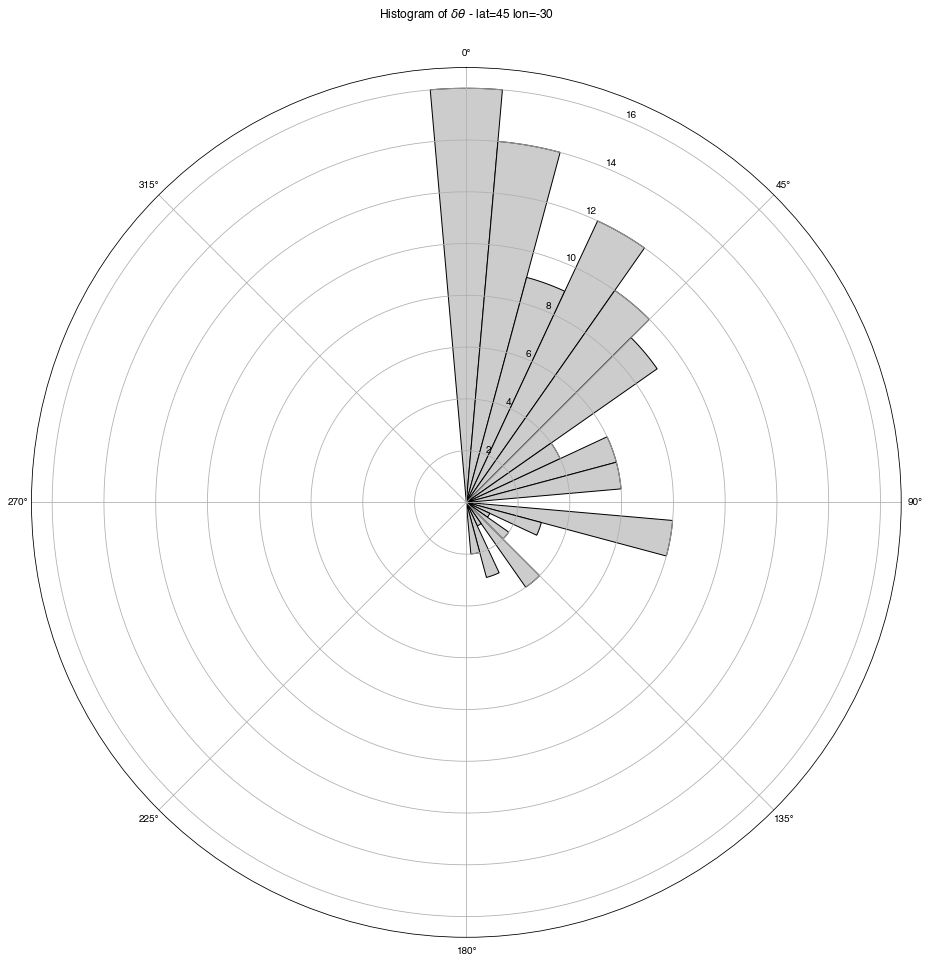

In [386]:
bin_size = 10

fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(111, projection='polar')
a , b = np.histogram(delta1, bins=np.arange(-5, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
ax1.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_title(r'Histogram of $\delta$$\theta $ - lat=45 lon=-30')




In [113]:
print(np.mean(np.arctan(Us_1.imag/Us_1.real))*180/np.pi)
print(np.mean(np.arctan(Us_2.imag/Us_2.real))*180/np.pi)

7.189009742964786
-15.245246897298799


/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [114]:
print(np.nanmean(np.arctan(Ue_one1.imag/Ue_one1.real))*180/np.pi)
print(np.nanmean(np.arctan(Ue_two1.imag/Ue_two1.real))*180/np.pi)

0.9458290220836486
-0.8390635024635439


In [115]:
print(np.nanmean(np.arctan((Ue_one1.imag+Us_1.imag)/(Ue_one1.real+Us_1.real))*180/np.pi))
print(np.nanmean(np.arctan((Ue_two1.imag+Us_1.imag)/(Ue_two1.real+Us_1.real))*180/np.pi))

0.2896869826183975
-1.2455073463785105


In [399]:
print(Ue_1[-1])
print(Ue_two1[-1])

(-0.14929852729150175-0.03236223914675048j)
(-0.024275144572565625-0.05387627277679137j)


## Global Statistics

In [102]:
def loader(path):
    paths = glob.glob(path)
    paths.sort(key=os.path.getmtime)
    file = xarray.open_mfdataset(paths, combine='by_coords')
    return file

Us_file = loader('/Volumes/4YP/Data/TimeSeries/Generated/Stokes*.nc')
#Ue_file = loader('/Volumes/4YP/Data/TimeSeries/Generated/Eulerian*.nc')
Ue_file = loader('/Volumes/JCHD/Microplastics_Paper/Data/TimeSeries/Eulerian*.nc')

In [103]:
Us = Us_file.uuss.values + (1j*Us_file.vuss.values)
Ue = Ue_file.U.values + (1j*Ue_file.V.values)

In [104]:
print(np.nanmean(abs(Us)))
print(np.nanmean(abs(Ue)))
print(np.nanmean(abs(Us+Ue)))
print(((np.nanmean(abs(Ue))/np.nanmean(abs(Us)))-1)*100)
print(((np.nanmean(abs(Ue+Us))/np.nanmean(abs(Us)))-1)*100)

0.07991543
0.052426010566442735
0.07343741945161647
-34.398134690637896
-8.106078500358349


In [370]:
CP = np.zeros([317,720])
V = np.zeros([317,720])
lat = Us_file.latitude.values
for n in range(len(lat)):
    
    
    latitude = lat[n]
    if latitude != 0:
        w = 7.2921 * (10**-5) * 3600
        latitude_rad = latitude * np.pi/180
        f = 2*w*np.sin(latitude_rad)
    
        if abs(latitude) < 20:
            v = ((10**-2) - (((10**-2)-(10**-6))/20)*(20 - abs(latitude)))*3600
        else:
            v = (10**-2)*3600
        
        for i in range(720):
            CP[n,i] = f
            V[n,i] = v

In [371]:
k_mean = np.mean(k_array, axis=0)

print(np.min(V))
print(np.max(CP))

0.0
0.5170547963333032


In [372]:
print(k_mean.shape)

Ds = np.sqrt((8*k_mean*k_mean*V)/abs(CP))

print(np.nanmean(Ds))

(317, 720)
1.7242380050228492


## Change of Angle

18.445086097697434


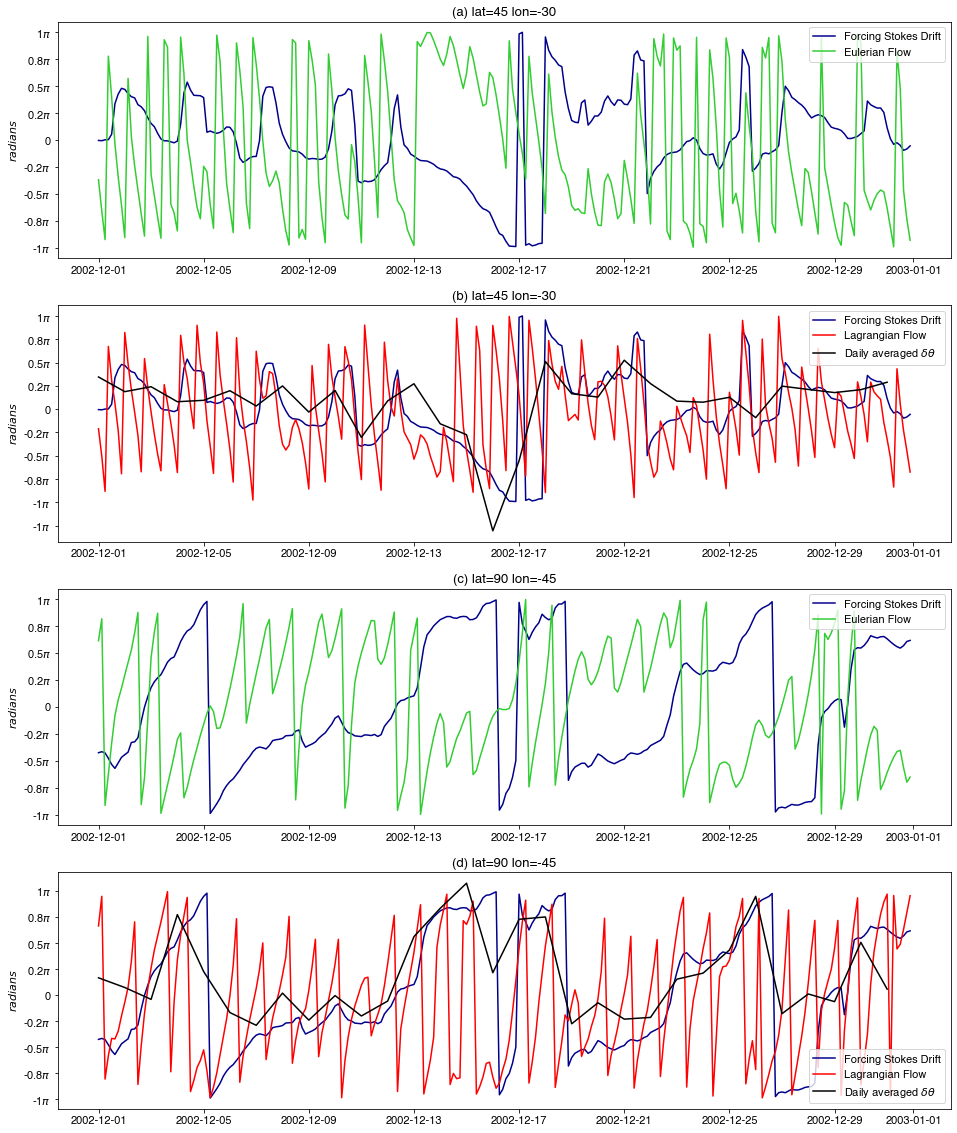

In [45]:
Us_angle1 = np.angle(Us_point1)
Ue_angle1 = np.angle(Ue_1)
Ul_angle1 = np.angle(Us_point1+Ue_1)

Ue_unwrap = np.unwrap(Ue_angle1)

delta_angle1 = Us_angle1 - Ul_angle1
delta_angle1_shifted = []

for a in delta_angle1:
    if a < -np.pi:
        a = a + 2*np.pi
        delta_angle1_shifted.append(a)
    else:
        delta_angle1_shifted.append(a)
        
delta_angle1_shifted = (np.array(delta_angle1_shifted)) 

Us_angle2 = np.angle(Us_point2)
Ue_angle2 = np.angle(Ue_2)
Ul_angle2 = np.angle(Us_point2+Ue_2)

delta_angle2 = Us_angle2 - Ul_angle2
print(np.rad2deg(delta_angle2.mean()))

delta_angle2_shifted = []

for a in delta_angle2:
    if a < -np.pi:
        a = a + 2*np.pi
        delta_angle2_shifted.append(a)
    else:
        delta_angle2_shifted.append(a)
        
delta_angle2_shifted = np.array(delta_angle2_shifted)    

fig = plt.figure(figsize=(16,20))

ax1 = plt.subplot(411)
ax1.set_title('(a) lat=45 lon=-30')
ax1.set_ylabel('$radians$')
plt.plot(time,Us_angle1, label='Forcing Stokes Drift', color='darkblue')
plt.plot(time,Ue_angle1, label='Eulerian Flow', color='limegreen')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
ax1.yaxis.set_major_locator(MultipleLocator(base=np.pi/4))
plt.legend()

ax1 = plt.subplot(412)
ax1.set_title('(b) lat=45 lon=-30')
ax1.set_ylabel('$radians$')
plt.plot(time,Us_angle1, label='Forcing Stokes Drift', color='darkblue')
plt.plot(time,Ul_angle1, label='Lagrangian Flow', color='red')
plt.plot(time[0::8],(Us_angle1-Ul_angle1).reshape(-1, 8).mean(axis=1), label=r'Daily averaged $\delta \theta$', color='black')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
ax1.yaxis.set_major_locator(MultipleLocator(base=np.pi/4))
plt.legend()

ax1 = plt.subplot(413)
ax1.set_title('(c) lat=90 lon=-45')
ax1.set_ylabel('$radians$')
plt.plot(time,Us_angle2, label='Forcing Stokes Drift', color='darkblue')
plt.plot(time,Ue_angle2, label='Eulerian Flow', color='limegreen')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
ax1.yaxis.set_major_locator(MultipleLocator(base=np.pi/4))
plt.legend()

ax1 = plt.subplot(414)
ax1.set_title('(d) lat=90 lon=-45')
ax1.set_ylabel('$radians$')
plt.plot(time,Us_angle2, label='Forcing Stokes Drift', color='darkblue')
plt.plot(time,Ul_angle2, label='Lagrangian Flow', color='red')
plt.plot(time[0::8],delta_angle2_shifted.reshape(-1, 8).mean(axis=1), label=r'Daily averaged $\delta \theta$', color='black')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'))
ax1.yaxis.set_major_locator(MultipleLocator(base=np.pi/4))
plt.legend()

## Wave Roses

In [3]:
def loader(path):
    paths = glob.glob(path)
    paths.sort(key=os.path.getmtime)
    file = xarray.open_mfdataset(paths, combine='by_coords')
    return file

Ue_file = loader('/Volumes/4YP/Data/TimeSeries/Generated/Eulerian*.nc')
Us_file = loader('/Volumes/4YP/Data/TimeSeries/Generated/Stokes*.nc')

In [4]:
Usu_point1 = Us_file.uuss[:,246,290].values
Usv_point1 = Us_file.vuss[:,246,290].values
Us_point1 = Usu_point1 + (1j*Usv_point1) 

Ueu_point1 = Ue_file.U[:,246,290].values
Uev_point1 = Ue_file.V[:,246,290].values
Ue_1 = Ueu_point1 + (1j*Uev_point1)

In [12]:
print(Us_point1[0], Ue_1[0])

(0.1385-0.002j) (0.0690621489594123-0.15920331393937356j)


In [6]:
Usu_point2 = Us_file.uuss[:,96,120].values
Usv_point2 = Us_file.vuss[:,96,120].values
Us_point2 = Usu_point2 + (1j*Usv_point2)

Ueu_point2 = Ue_file.U[:,96,120].values
Uev_point2 = Ue_file.V[:,96,120].values
Ue_2 = Ueu_point2 + (1j*Uev_point2)

time = Us_file.uuss['time'].values

In [5]:
Us_angles1 = np.arctan(Us_point1.imag/Us_point1.real)
Ue_angles1 = np.arctan(Ue_1.imag/Ue_1.real)
Ul_angles1 = np.arctan((Us_point1+Ue_1).imag/(Us_point1+Ue_1).real)
delta1_r = Us_angles1 - Ul_angles1
delta1 = (((Us_angles1 - Ul_angles1) * 360) / (2*np.pi))

In [7]:
delta1a = []
for d in delta1:
    if d < 0:
        d = d + 360
        delta1a.append(d)
    else:
        delta1a.append(d)
        
delta1a_r = []
for d in delta1:
    if d < 0:
        d = d + (2*np.pi)
        delta1a.append(d)
    else:
        delta1a.append(d)

In [8]:
Us_angles2 = np.arctan(Us_point2.imag/Us_point2.real)
Ue_angles2 = np.arctan(Ue_2.imag/Ue_2.real)
Ul_angles2 = np.arctan((Us_point2+Ue_2).imag/(Us_point2+Ue_2).real)
delta2_r = Us_angles2 - Ul_angles2
delta2 = (((Us_angles2 - Ul_angles2) * 360) / (2*np.pi))

/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [9]:
delta2a = []
for d in delta2:
    if d < 0:
        d = d + 360
        delta2a.append(d)
    else:
        d = d + 360
        delta2a.append(d)

In [10]:
average = np.median(delta2a)
print(average)

337.4394652032986


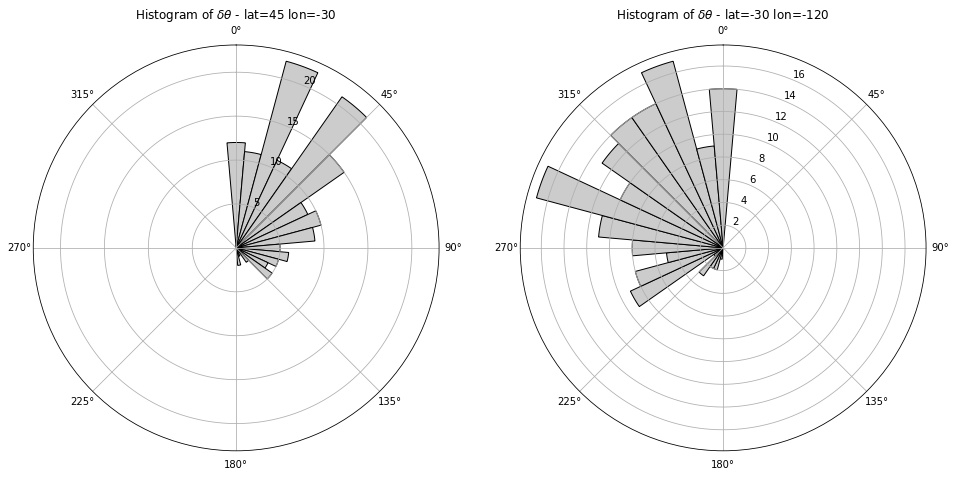

In [14]:
bin_size = 10

fig = plt.figure(figsize=(16,40))

ax1 = fig.add_subplot(221, projection='polar')
a , b = np.histogram(delta1, bins=np.arange(-5, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
ax1.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_title(r'Histogram of $\delta$$\theta $ - lat=45 lon=-30')

ax1 = fig.add_subplot(222, projection='polar')
a , b = np.histogram(delta2a, bins=np.arange(-5, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
ax1.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_title(r'Histogram of $\delta$$\theta $ - lat=-30 lon=-120')

plt.show()

#plt.savefig('/Users/jakecunningham/Documents/4YP/Figures/Delta_theta_polar_plots.png', format='png', dpi=600)

In [53]:
angles_1 = np.arctan(Us_file.vuss.values/Us_file.uuss.values)
Ul = Us_file.uuss.values+(1j*Us_file.vuss.values)+Ue_file.U.values+(1j*Ue_file.V.values)
angles_2 = np.arctan(Ul.imag/Ul.real)

/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arctan
  """Entry point for launching an IPython kernel.
/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jakecunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel pac

In [54]:
delta = (angles_1 - angles_2)*180/np.pi
deltaa = []
for dss in tqdm(delta):
    for ds in dss:
        for d in ds:
        
            if d < 0:
                d = d + 360
                deltaa.append(d)
            else:
                deltaa.append(d)

<Figure size 504x504 with 0 Axes>

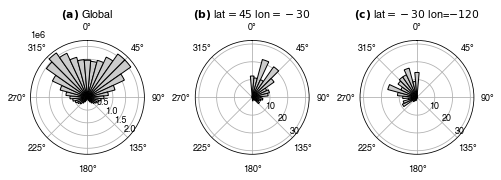

In [55]:
bin_size = 10

fig = plt.figure(figsize=(7,7))

fig = plt.figure(figsize=(7,7))

font = {'family':'sans-serif',
        'sans-serif':['Helvetica'],
        'weight' : 'normal',
        'size'   : 9}

matplotlib.rc('font', **font)
plt.rc('axes', axisbelow=True)

ax1 = fig.add_subplot(331, projection='polar')
a , b = np.histogram(deltaa, bins=np.arange(-5, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
ax1.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_title(r'$\bf{(a)}$ Global', y=1.15)
ax1.set_rlabel_position(135)

ax1 = fig.add_subplot(332, projection='polar')
a , b = np.histogram(delta1, bins=np.arange(-5, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
ax1.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_title(r'$\bf{(b)}$ lat$=45$ lon$=-30$', y=1.15)
ax1.set_rlabel_position(135)
ax1.set_rmax(32)
ax1.set_rticks([10, 20, 30])

ax1 = fig.add_subplot(333, projection='polar')
a , b = np.histogram(delta2a, bins=np.arange(-5, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
ax1.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color='.8', edgecolor='k')
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
ax1.set_title(r'$\bf{(c)}$ lat$=-30$ lon=$-120$', y=1.15)
ax1.set_rlabel_position(135)
ax1.set_rmax(32)
ax1.set_rticks([10, 20, 30])

plt.tight_layout()

#plt.savefig('/Users/jakecunningham/Documents/4YP/Figures/Wave_Roses_2002.png', format='png', dpi=600,bbox_inches = "tight")